In [1]:
import sys
sys.path.append('../')
from abel import *
%load_ext autoreload
%autoreload 2
#from abel.classes.stage.impl import stage_quasistatic_2d_radiation_reaction as rr
import numpy as np
import matplotlib.pyplot as plt
#from abel.utilities.statistics import prct_clean, prct_clean2d
#from matplotlib.animation import FuncAnimation
import time

In [2]:
# define driver
driver = SourceBasic()
driver.charge = -2.7e10 * SI.e # [C]
driver.energy = 31.25e9 # [eV]
driver.rel_energy_spread = 0.01
driver.bunch_length = 50e-6 # [m]
driver.z_offset = 580e-6 # [m]
driver.emit_nx, driver.emit_ny = 10e-6, 10e-6 # [m rad]
driver.beta_x, driver.beta_y = 1, 1 #30e-3, 30e-3 # [m]
driver.num_particles = 100000
driver.jitter.x = 0 # [m] 2e-6
driver.jitter.y = 0 # [m] 100e-9
driver.jitter.t = 0 #10e-15 # [m]
driver.symmetrize = True

# define stage
stage = StageHipace()
stage.driver_source = driver
stage.length = 11 # [m]
stage.plasma_density = 2e21 # [m^-3]
stage.nom_energy_gain = 31.9e9/(11/stage.length) # [eV]
stage.radiation_reaction = True
stage.ion_motion = False
stage.beam_ionization=False
stage.num_nodes = 13

# define first stage (half length)
#first_stage = StageHipace()
#first_stage.driver_source = driver
#first_stage.length = stage.length/2 # [m]
#first_stage.plasma_density = 2e21 # [m^-3]
#first_stage.nom_energy_gain = stage.nom_energy_gain/2 # [eV]
#first_stage.radiation_reaction = stage.radiation_reaction

# define beam
source = SourceBasic()
source.charge = -1e10 * SI.e # [C]
source.energy = 470e9 # [eV]
source.rel_energy_spread = 0.01
source.bunch_length = 28e-6 # [m]
source.z_offset = 0e-6 # [m]
source.emit_nx, source.emit_ny = 160e-6, 0.56e-6 # [m rad]
source.beta_x = stage.matched_beta_function(source.energy)
source.beta_y = source.beta_x
source.num_particles = 10000
source.jitter.t = driver.jitter.t

# define interstage
interstage = InterstageBasic()
interstage.beta0 = lambda E: stage.matched_beta_function(E)
interstage.dipole_length = lambda E: 1 * np.sqrt(E/10e9) # [m(eV)]
interstage.dipole_field = 1 # [T]

# beam delivery system
bds = BeamDeliverySystemBasic()
bds.beta_x, bds.beta_y = 8e-3, 0.4e-3 # [m]
bds.bunch_length = 0.75 * bds.beta_y

# define linac
linac = Linac()
linac.source = source
linac.stage = stage
#linac.first_stage = first_stage
linac.interstage = interstage
linac.num_stages = 1
save = True
shots = 1

In [3]:
name = f'linac_hipace_{int(source.energy/1e9)}GeV_\
{interstage.dipole_field}T_ex_{source.emit_nx*1e6}_jitterx_{driver.jitter.x}_\
jittery_{driver.jitter.y}_RR_{stage.radiation_reaction}N_{linac.num_stages}_11m_{shots}_shot'

linac.run(name, num_shots=shots, overwrite=False, parallel=False);


Tracking element 1 (SourceBasic, stage 0, s = 0.0 m, 470.0 GeV, -1.60 nC, 1.0% rms, 160.8/0.6 µm-rad)
Running job 5325628
>> Starting (0:00)
>> Starting (0:00)
>> Starting (0:00)
>> Starting (0:00)
>> Starting (0:00)
>> Starting (0:00)
>> Starting (0:00)
>> Starting (0:00)
>> Starting (0:00)
>> Starting (0:00)
>> Starting (0:00)
>> Starting (0:00)
>> Starting (0:00)
>> Starting (0:00)
>> Starting (0:00)
>> Starting (0:00)
>> Starting (0:00)
>> Starting (0:00)
>> Starting (0:00)
>> Starting (0:00)
>> Starting (0:00)
>> Starting (0:00)
>> Starting (0:00)
>> Starting (0:00)
>> Starting (0:00)
>> Starting (0:00)
>> Running (0:06)
>> Running (0:16)
>> Running (0:26)
>> Running (0:36)
>> Running (0:46)
>> Running (0:57)
>> Running (1:07)
>> Running (1:17)
>> Running (1:27)
>> Running (1:37)
>> Running (1:47)
>> Running (1:57)
>> Running (2:07)
>> Running (2:17)
>> Running (2:27)
>> Ending (2:35)
Tracking element 2 (StageHipace, stage 1, s = 11.0 m, 472.3 GeV, -1.60 nC, 7.9% rms, 56165.8/5708

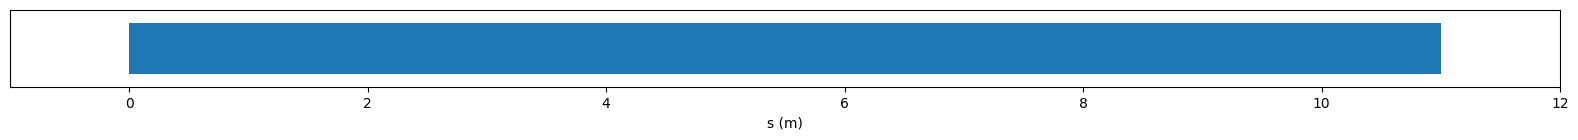

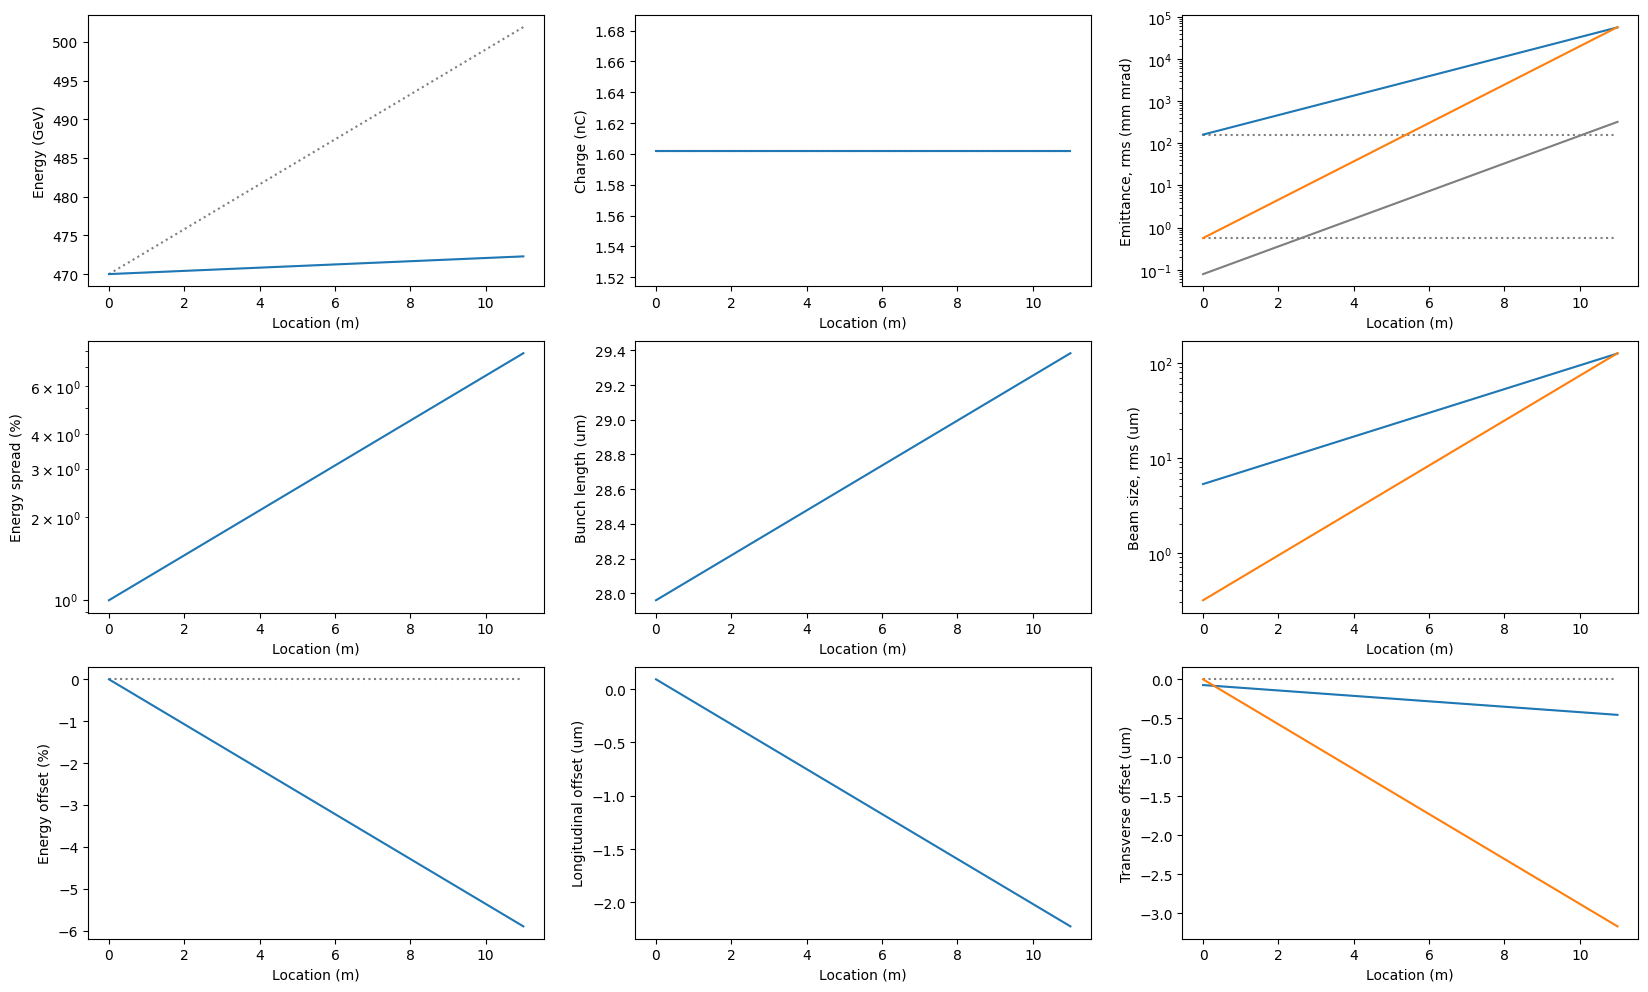

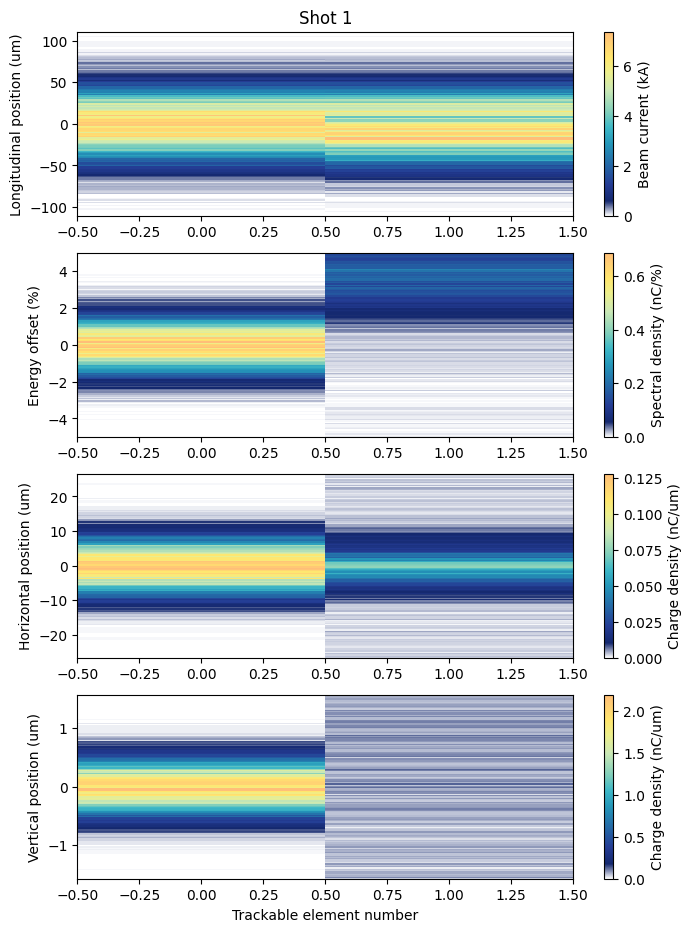

In [4]:
linac.plot_survey()

#linac.stages[0].plot_wakefield()

# plot beam evolution
fig_9GeV = linac.plot_evolution()
if save:
    fig_9GeV.savefig(f'Plots_with_updated_params/Hipace_{shots}_shots_{int(source.energy/1e9)}GeV_{int(source.emit_nx*1e6)}\
    mmmrad_{int(source.emit_ny*1e6)}\
    mmmrad_{interstage.dipole_field}T_RR_{stage.radiation_reaction}_B_{interstage.dipole_field}T_11m.png')

linac.plot_waterfalls()

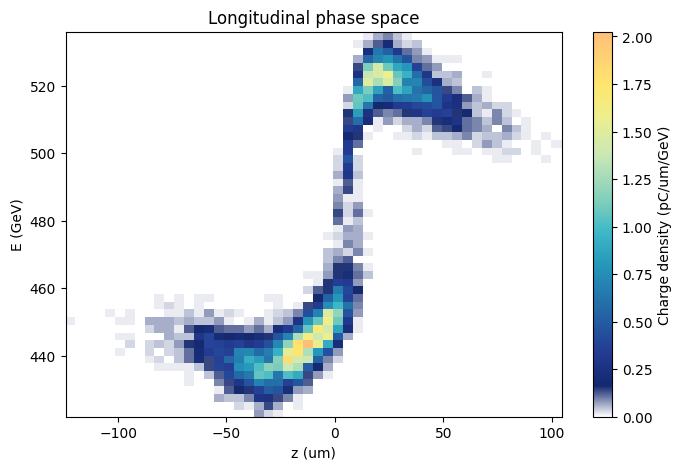

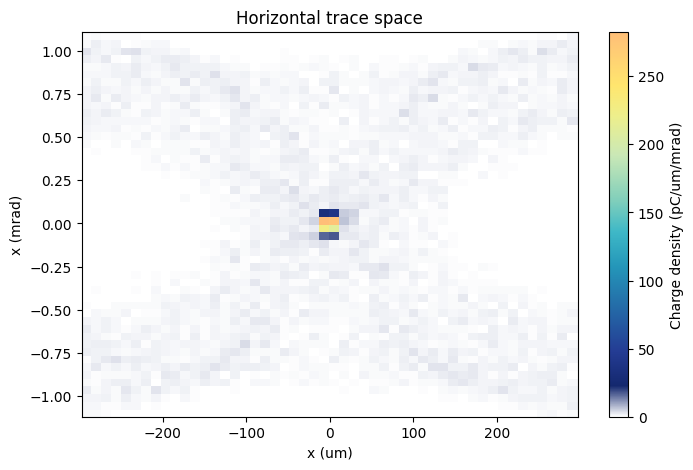

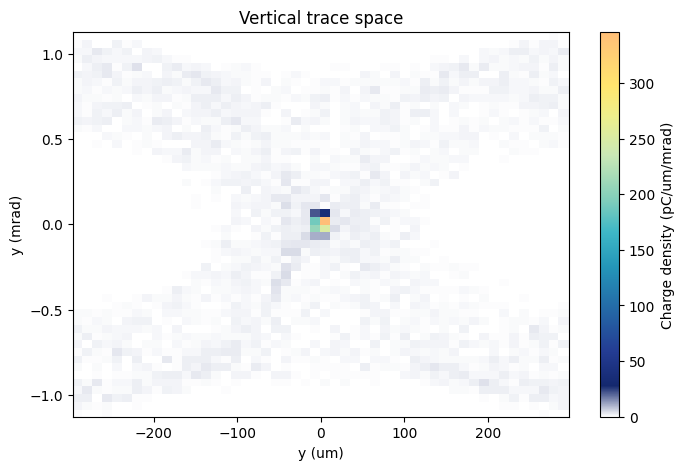

In [5]:
linac.final_beam().plot_lps()

linac.final_beam().plot_trace_space_x()
linac.final_beam().plot_trace_space_y()

In [6]:
linac.stages[0].plot_initial_bubble() 
linac.stages[0].plot_final_bubble()

AttributeError: 'StageHipace' object has no attribute 'plot_initial_bubble'